In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dd.dd import Analysis_DD
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:


HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)
pathTT_3BFF = HOME_DIR + 'content/trained_models/task-trained/tt_3bff/'
an_TT_3BFF = Analysis_TT(run_name = "TT_3BFF", filepath = pathTT_3BFF)

path_GRU_Sweep_3BFF = pathTT_3BFF + "20250130_NBFF_GRU_RNN_Viz/"
subfolders_GRU_3BFF = [f.path for f in os.scandir(path_GRU_Sweep_3BFF) if f.is_dir()]

path_LFADS_Sweep_3BFF = pathTT_3BFF + "20250130_NBFF_LFADS_Viz/"
subfolders_LFADS_3BFF = [f.path for f in os.scandir(path_LFADS_Sweep_3BFF) if f.is_dir()]

path_LDS_Sweep_3BFF = pathTT_3BFF + "20250130_NBFF_LDS_Viz/"
subfolders_LDS_3BFF = [f.path for f in os.scandir(path_LDS_Sweep_3BFF) if f.is_dir()]

/home/csverst/Github/CtDBenchmark/


In [3]:
comparison_3BFF = Comparison(comparison_tag="3BFF")
comparison_3BFF.load_analysis(an_TT_3BFF, reference_analysis=True, group = "TT")

for subfolder in subfolders_GRU_3BFF:
    subfolder = subfolder + "/"
    analysis_GRU = Analysis_DD.create(run_name = "GRU", filepath = subfolder, model_type = "SAE")
    comparison_3BFF.load_analysis(analysis_GRU, group = "GRU")

for subfolder in subfolders_LFADS_3BFF:
    subfolder = subfolder + "/"
    analysis_LFADS = Analysis_DD.create(run_name = "LFADS", filepath = subfolder, model_type = "LFADS")
    comparison_3BFF.load_analysis(analysis_LFADS, group = "LFADS")

for subfolder in subfolders_LDS_3BFF:
    subfolder = subfolder + "/"
    analysis_LDS = Analysis_DD.create(run_name = "LDS", filepath = subfolder, model_type = "SAE")
    comparison_3BFF.load_analysis(analysis_LDS, group = "LDS")

comparison_3BFF.regroup()
# comparison_3BFF.plot_trials(num_trials=2)

In [ ]:
latents= an_TT_3BFF.get_latents(phase= 'val')
spiking = analysis_LFADS.get_model_inputs(phase ='val')

In [4]:
comparison_NBFF_single = Comparison(comparison_tag="NBFF_single")
comparison_NBFF_single.load_analysis(an_TT_3BFF, reference_analysis=True, group = "TT")
comparison_NBFF_single.load_analysis(analysis_LFADS, group = "LFADS")
comparison_NBFF_single.load_analysis(analysis_GRU, group = "GRU")
comparison_NBFF_single.load_analysis(analysis_LDS, group = "LDS")

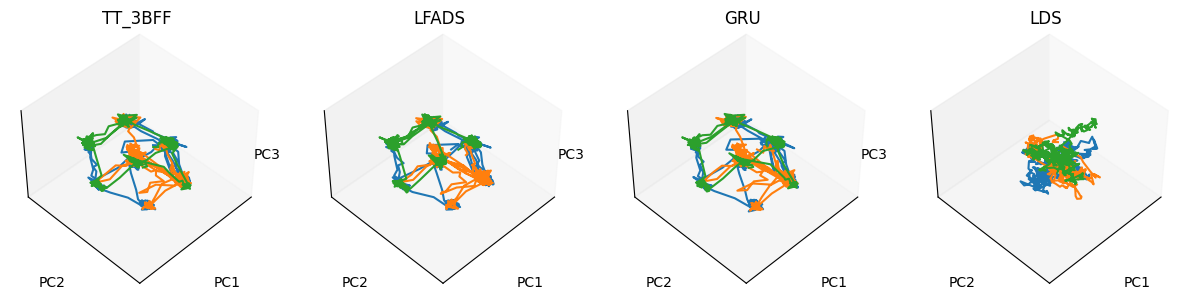

In [5]:

fig = comparison_NBFF_single.plot_trials_3d_reference(num_trials=3, savePDF=True, angle = [45, 45])

In [6]:
fig.show()
plt.savefig("temp.pdf")

/tmp/ipykernel_3685023/3598058904.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>